# Internship : Innomatics Data Science
                                                            

###  Importing required libraries   

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Loading all the Datasets

In [5]:

links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

### Q2 : Finding the shape of the movies.csv file

In [6]:
# I am using shape function
movies.shape

(9742, 3)

### Q3 : Finding the shape of ratings.csv file  

In [7]:
ratings.shape

(100836, 4)

### Q4 : Finding the number of unique userId from ratings

In [8]:
# I am using nunique() function to fing unique users

unique_users = ratings['userId'].nunique()

unique_users

610

### Q5 : Finding the movie which has recieved max num of user ratings  

In [10]:
# Combinig the ratings of same movieId and counting the no.of ratings for each movie
count_movie_rating = ratings.groupby('movieId').size()

# Finding the movie with the max no.of ratings
max_rated_movie_id = count_movie_rating.idxmax()

# Finding the title of the movie with the max no.of ratings
max_rated_movie_title = movies[movies['movieId'] == max_rated_movie_id]['title'].iloc[0]

print("Maximum rated movie:", max_rated_movie_title)
print("Movie ID of maximum rated movie :", max_rated_movie_id)


Maximum rated movie: Forrest Gump (1994)
Movie ID of maximum rated movie : 356


### Q6 : Finding all the correct tags submitted by users to "Matrix, The (1999)" movie  

In [12]:
# Finding the movieId for "Matrix, The (1999)"
movie_Matrix = movies[movies['title'] == 'Matrix, The (1999)']
movie_Matrix_id = movie_Matrix['movieId'].values[0]

# Filtering tags for the movie in terms of movieId
matrix_tags = tags[tags['movieId'] == movie_Matrix_id]

# Printing unique tags for the movie Matrix
unique_tags = matrix_tags['tag'].unique()
print("Tags submitted for 'Matrix, The (1999)':")
print(unique_tags)

Tags submitted for 'Matrix, The (1999)':
['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


### Q7 : Getting the avg user rating for the movie named "Terminator 2: Judgment Day (1991)"

In [13]:
# Finding the movieId for "Terminator 2: Judgment Day (1991)"
movie_Terminator2 = movies[movies['title'] == 'Terminator 2: Judgment Day (1991)']

if not movie_Terminator2.empty:
    terminator_movie_id = movie_Terminator2.iloc[0]['movieId']

    # Finding the avg user rating for the movie Terminator 2
    avg_rating = ratings[ratings['movieId'] == terminator_movie_id]['rating'].mean()

    print(f"Avg user rating of 'Terminator 2: Judgment Day (1991)': {avg_rating:.2f}")
else:
    print("Movie does not exist")

Avg user rating of 'Terminator 2: Judgment Day (1991)': 3.97


### Q8 :  Getting the data distribution of user ratings for "Fight Club (1999)" movie

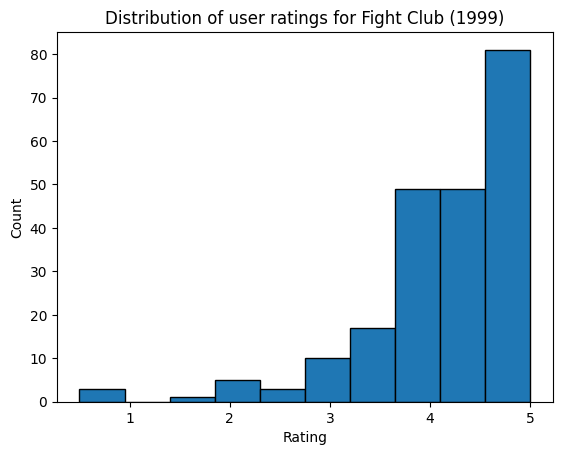

In [15]:
# Finding the movieId for "Fight Club (1999)"
movie_fight_club = movies[movies['title'] == 'Fight Club (1999)']

if not movie_fight_club.empty:
    movie_fight_club_id = movie_fight_club.iloc[0]['movieId']

    # Filtering ratings for the movie
    fight_club_ratings = ratings[ratings['movieId'] == movie_fight_club_id]['rating']

    # histogram of user ratings for "Fight Club (1999)"
    plt.hist(fight_club_ratings, bins=10, edgecolor='black')
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.title('Distribution of user ratings for Fight Club (1999)')
    plt.show()
else:
    print("Movie does not exist")

- The distribution is left-skewed, meaning most of the data points are concentrated on the right side, while the tail stretches out to the left side.

## Creating a Filtered Dataset using the mentioned Mandatory Operations for solving the futher questions

In [22]:
# Grouping user ratings by movieId and apply count and mean operations
grouped_ratings = ratings.groupby('movieId')['rating'].agg(['count','mean']).reset_index()

# Renaming columns for clarity
grouped_ratings.columns = ['movieId', 'rating_count', 'rating_mean']

# Merging movies data with grouped ratings using inner join
merged_data = pd.merge(movies, grouped_ratings, on='movieId', how='inner')

# Filtering movies with more than 50 user ratings
filtered_data = merged_data[merged_data['rating_count'] > 50]

# Displaying the resulting dataset
filtered_data.head()

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185


### Q9 : Getting the most popular movie based on the avg user rating  

In [23]:
# Sorting the filtered dataset by 'rating_mean' in descending order
sorted_data = filtered_data.sort_values(by='rating_mean', ascending=False)

# Getting the most popular movie (highest average rating)
most_popular_movie = sorted_data.iloc[0]

print("Most popular movie based on average user ratings:")
print("Title:", most_popular_movie['title'])
print("Average Rating:", most_popular_movie['rating_mean'])

Most popular movie based on average user ratings:
Title: Shawshank Redemption, The (1994)
Average Rating: 4.429022082018927


### Q10 : Getting the top 5 popular movies based on the number of user ratings  

In [24]:
# Sorting the filtered dataset by 'rating_count' in descending order
sorted_by_ratings_count = filtered_data.sort_values(by='rating_count', ascending=False)

# Getting the top 5 popular movies based on number of user ratings
top_5_popular_movies = sorted_by_ratings_count.head(5)

# Displaying the titles of the top 5 popular movies
print("Top 5 popular movies based on number of user ratings:")
print(top_5_popular_movies[['title', 'rating_count']])

Top 5 popular movies based on number of user ratings:
                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1938                Matrix, The (1999)           278


### Q11 : Getting the 3rd most popular Sci-Fi movie based on the number of user ratings  

In [25]:
# Filtering the dataset for Sci-Fi movies
sci_fi_movies = filtered_data[filtered_data['genres'].str.contains('Sci-Fi')]

# Sorting the Sci-Fi movies by 'rating_count' in descending order
sorted_sci_fi_by_ratings = sci_fi_movies.sort_values(by='rating_count', ascending=False)

# Getting the third most popular Sci-Fi movie based on number of user ratings
third_most_popular_sci_fi = sorted_sci_fi_by_ratings.iloc[2]  # Index 2 for the third movie (0-indexed)

print("Third most popular Sci-Fi movie based on number of user ratings:")
print("Title:", third_most_popular_sci_fi['title'])
print("Number of User Ratings:", third_most_popular_sci_fi['rating_count'])

Third most popular Sci-Fi movie based on number of user ratings:
Title: Jurassic Park (1993)
Number of User Ratings: 238


### Performing WebScraping for getting the IMDB Reviews columns in the filtered dataset

In [27]:
# First we merged our filtered_data with the 'imdbId' col of the links_data

# Merge filtered_data with links_data
filtered_data_with_imdb = pd.merge(filtered_data, links[['movieId', 'imdbId']], on='movieId', how='left')

# Display the resulting dataset with the new 'imdbId' column
filtered_data_with_imdb.head()

,movieId,title,genres,rating_count,rating_mean,imdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319


In [28]:
import requests
import numpy as np
from bs4 import BeautifulSoup
def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8',
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    imdb_rating = soup.find('span', {'itemprop': 'ratingValue'})
    return imdb_rating.text if imdb_rating else np.nan


Since this method is generating an error, let's attempt a different approach.

* We'll bring in the IMDB Dataset and conduct data cleaning to retain the necessary columns only.

In [30]:
# Reading the imdb dataset

imdb = pd.read_csv('imdb.csv')

imdb.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [31]:
# Displaying the columns present in the above dataset

imdb.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

- For solving the remaning questions we only need **'Series_Title'**, **'Genre'**, and **'IMDB_RATING'** columns

In [32]:
# Creating a new DataFrame with only the specified columns
imdb_data_filtered = imdb[['Series_Title', 'Genre', 'IMDB_Rating']]

# Displaying the filtered IMDb dataset
imdb_data_filtered.head()

,Series_Title,Genre,IMDB_Rating
0,The Shawshank Redemption,Drama,9.3
1,The Godfather,"Crime, Drama",9.2
2,The Dark Knight,"Action, Crime, Drama",9.0
3,The Godfather: Part II,"Crime, Drama",9.0
4,12 Angry Men,"Crime, Drama",9.0


### Q12 : Getting the 'movieId' of the movie which has the highest IMDB Rating  

- Approach :  We can get the highest IMDB Rating movie from  the 'imdb_data_filtered' dataset and corresponding find its 'movieId' from the 'filtered_data_with_imdb' dataset

In [33]:
highest_rating = imdb_data_filtered['IMDB_Rating'].max()
highest_rated_movies = imdb_data_filtered[imdb_data_filtered['IMDB_Rating'] == highest_rating]


highest_rated_movie_names = highest_rated_movies['Series_Title']

print(f"The name of the movie with the highest rating ({highest_rating}):")
print(highest_rated_movie_names)

The name of the movie with the highest rating (9.3):
0    The Shawshank Redemption
Name: Series_Title, dtype: object


- So, The Shawshank Redemption is the highest IMDB Rated movie

Now, to gets its movieId from the movies_data dataset or filtered_data_with_imdb dataset

In [34]:
movie_id_shawshank = filtered_data_with_imdb.loc[filtered_data_with_imdb['title'] == 'Shawshank Redemption, The (1994)', 'movieId'].values[0]

print(f"The 'movieId' of 'Shawshank Redemption, The (1994)' is: {movie_id_shawshank}")


The 'movieId' of 'Shawshank Redemption, The (1994)' is: 318


### Q13 : Getting the 'movieId' of the 'Sci-Fi' movie which has the highest IMDB Rating  

* Approach : We can get the highest IMDB Rating Sci-Fi movie from the 'imdb_data_filtered' dataset and corresponding find its 'movieId' from the 'filtered_data_with_imdb' dataset

In [35]:
# Filtering the DataFrame for Sci-Fi genre
sci_fi_movies = imdb_data_filtered[imdb_data_filtered['Genre'].str.contains('Sci-Fi', case=False)]

# Finding the highest-rated Sci-Fi movie
highest_rated_sci_fi_movie = sci_fi_movies.loc[sci_fi_movies['IMDB_Rating'].idxmax()]
highest_rated_sci_fi_movie_title = highest_rated_sci_fi_movie['Series_Title']

print("Highest-rated Sci-Fi movie:")
print(highest_rated_sci_fi_movie_title)


Highest-rated Sci-Fi movie:
Inception


* So, Inception is the highest IMDB Rated movie


Now, to gets its movieId from the movies_data dataset or filtered_data_with_imdb dataset

In [36]:
movie_id_inception = filtered_data_with_imdb.loc[filtered_data_with_imdb['title'] == 'Inception (2010)', 'movieId'].values[0]

print(f"The 'movieId' of 'Inception' is: ",{movie_id_inception})


The 'movieId' of 'Inception' is:  {79132}


## Innomatics Data Science Internship |  Entrance Test Completed